In [1]:
import numpy as np
import sys
sys.path.append('../')
from cycada.data.data_loader import get_dataset
import PIL.Image as Image
from os.path import join
import os

/Users/pomvrp/Documents/NTU AI Courses/AI6121 computer vision/18 Nov Project/cycada_release/.venv/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from torchvision import datasets

mnist_dataset = datasets.MNIST('../x/jhoffman/mnist/', train=True, transform=None, 
                               target_transform=None, download=True)
svhn_dataset = datasets.SVHN('../x/jhoffman/svhn/', split='train', transform=None, 
                             target_transform=None, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 15668867.84it/s]


Extracting ../x/jhoffman/mnist/MNIST/raw/train-images-idx3-ubyte.gz to ../x/jhoffman/mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 27123979.81it/s]

Extracting ../x/jhoffman/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ../x/jhoffman/mnist/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 10456379.76it/s]


Extracting ../x/jhoffman/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ../x/jhoffman/mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2211320.81it/s]


Extracting ../x/jhoffman/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../x/jhoffman/mnist/MNIST/raw



100%|██████████| 182040794/182040794 [00:38<00:00, 4728717.74it/s]


In [5]:
import os
from PIL import Image

def process_dataset(gt_folder, img_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    images_output_folder = os.path.join(output_folder, 'images')
    if not os.path.exists(images_output_folder):
        os.makedirs(images_output_folder)

    labels_file = os.path.join(output_folder, 'labels.txt')
    with open(labels_file, 'w') as labels_f:
        img_index = 0

        for gt_file in os.listdir(gt_folder):
            gt_path = os.path.join(gt_folder, gt_file)
            img_name = gt_file.replace('gt_', '').replace('.txt', '.jpg')
            img_path = os.path.join(img_folder, img_name)

            if os.path.exists(img_path):
                img = Image.open(img_path)
                with open(gt_path, 'r') as f:
                    for line in f:
                        parts = line.strip().split(',')
                        if len(parts) == 9:
                            coordinates = list(map(int, parts[:8]))
                            label = parts[8]

                            # Define bounding box
                            left = min(coordinates[0::2])
                            top = min(coordinates[1::2])
                            right = max(coordinates[0::2])
                            bottom = max(coordinates[1::2])

                            # Crop and save image
                            cropped_img = img.crop((left, top, right, bottom))
                            cropped_img_path = os.path.join(images_output_folder, f'{img_index}.png')
                            cropped_img.save(cropped_img_path)

                            # Write label
                            labels_f.write(f'{img_index} {label}\n')
                            img_index += 1

# Process each dataset
process_dataset('../2013/Challenge2_Training_Task1_GT', '../2013/Challenge2_Training_Task12_Images', '../FY/Train/TrainA')
process_dataset('../2013/Challenge2_Test_Task12_Images', '../2013/Challenge2_Test_Task12_Images 2', '../FY/Test/TestA')
process_dataset('../2015/ch4_training_localization_transcription_gt', '../2015/ch4_training_images', '../FY/Train/TrainB')
process_dataset('../2015/Challenge4_Test_Task1_GT', '../2015/ch4_test_images', '../FY/Test/TestB')


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

In [3]:
import os
from PIL import Image

def process_dataset(gt_folder, img_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    images_output_folder = os.path.join(output_folder, 'images')
    if not os.path.exists(images_output_folder):
        os.makedirs(images_output_folder)

    labels_file = os.path.join(output_folder, 'labels.txt')
    with open(labels_file, 'w') as labels_f:
        img_index = 0

        for gt_file in os.listdir(gt_folder):
            gt_path = os.path.join(gt_folder, gt_file)
            img_name = gt_file.replace('gt_', '').replace('.txt', '.jpg')
            img_path = os.path.join(img_folder, img_name)

            if os.path.exists(img_path):
                img = Image.open(img_path)
                try:
                    with open(gt_path, 'r', encoding='utf-8') as f:
                        lines = f.readlines()
                except UnicodeDecodeError:
                    with open(gt_path, 'r', encoding='ISO-8859-1') as f:
                        lines = f.readlines()

                for line in lines:
                    parts = line.strip().split(',')
                    if len(parts) == 9:
                        coordinates = list(map(int, parts[:8]))
                        label = parts[8]

                        # Define bounding box
                        left = min(coordinates[0::2])
                        top = min(coordinates[1::2])
                        right = max(coordinates[0::2])
                        bottom = max(coordinates[1::2])

                        # Crop and save image
                        cropped_img = img.crop((left, top, right, bottom))
                        cropped_img_path = os.path.join(images_output_folder, f'{img_index}.png')
                        cropped_img.save(cropped_img_path)

                        # Write label
                        labels_f.write(f'{img_index} {label}\n')
                        img_index += 1

# Process each dataset
process_dataset('../2013/Challenge2_Training_Task1_GT', '../2013/Challenge2_Training_Task12_Images', '../FY/Train/TrainA')
process_dataset('../2013/Challenge2_Test_Task12_Images', '../2013/Challenge2_Test_Task12_Images 2', '../FY/Test/TestA')
process_dataset('../2015/ch4_training_localization_transcription_gt', '../2015/ch4_training_images', '../FY/Train/TrainB')
process_dataset('../2015/Challenge4_Test_Task1_GT', '../2015/ch4_test_images', '../FY/Test/TestB')



ValueError: invalid literal for int() with base 10: '\x9cÒªí"\x136ÝÁ\x88b\x1c\x00\x01\x03\x93í×\x15\x14\x9er$\x80\x1c\x8f06Ö\x19 ~5I\'hÉèaZ¬]Õ%©n-ÆHÙ\x89dR\x0eÅã\x7fµ8F$Ê§Ê\x06S\x9cÔû\x94äÚZ"i¨Ô\x8bOF&Ý\x9eZ\x82\\©ò\x94\x80s\x83Ü\x81W\xa0ÒnÚ\x1dñ\x13þ³

In [12]:
import os
from PIL import Image

def load_vocabulary(file_path):
    with open(file_path, 'r') as file:
        vocabulary = [line.strip() for line in file]

    word_to_index = {word: index for index, word in enumerate(vocabulary)}
    word_to_index["###"] = len(word_to_index)  # Handle special cases

    return word_to_index

def word_to_label(word, word_to_index):
    return word_to_index.get(word, word_to_index["###"])  # Returns the index for "###" if the word is not found

def process_dataset(gt_folder, img_folder, output_folder, word_to_index, numeric_naming=False, diagonal_points=False):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    images_output_folder = os.path.join(output_folder, 'images')
    if not os.path.exists(images_output_folder):
        os.makedirs(images_output_folder)

    labels_file = os.path.join(output_folder, 'labels.txt')
    
    with open(labels_file, 'w') as labels_f:
        img_index = 0

        for gt_file in os.listdir(gt_folder):
            gt_path = os.path.join(gt_folder, gt_file)
            print(gt_path)

            if numeric_naming:
                # Extract the numeric part for numeric naming convention
                numeric_part = gt_file.split('_')[1].split('.')[0]  # Extracts the number from '100.txt'
                img_name = f'{numeric_part}.jpg'  # Constructs the corresponding image filename
            else:
                # Extract the numeric part for 'img_X.jpg' naming convention
                numeric_part = gt_file.split('_')[2].split('.')[0]
                img_name = f'img_{numeric_part}.jpg'

            img_path = os.path.join(img_folder, img_name)
            print(img_path)

            if os.path.exists(img_path):
                img = Image.open(img_path)
                try:
                    with open(gt_path, 'r', encoding='utf-8') as f:
                        lines = f.readlines()
                except UnicodeDecodeError:
                    with open(gt_path, 'r', encoding='ISO-8859-1') as f:
                        lines = f.readlines()

                for line in lines:

                    if ',' in line:
                        parts = line.strip().split(',')
                        print (parts)
                    else:
                        parts = line.strip().split(' ')
                        print (parts)
                   
                    if ((len(parts) == 9) or (len(parts) == 5)):
                       
                        if (len(parts) == 5):
                            try:
                                coordinates = list(map(int, parts[:4]))
                                label_word = parts[4]
                                print(label_word)
                                label_index = word_to_label(label_word, word_to_index)  # Convert word to label index   
                            except ValueError:
                                continue
                
                            # If coordinates are diagonal points (x1, y1, x3, y3)
                            x1, y1, x3, y3 = coordinates[0], coordinates[1], coordinates[2], coordinates[3]
                            left, top = min(x1, x3), min(y1, y3)
                            right, bottom = max(x1, x3), max(y1, y3)
                        else:
                            try:
                                coordinates = list(map(int, parts[:8]))
                                label_word = parts[8]
                                print (label_word)
                                label_index = word_to_label(label_word, word_to_index)  # Convert word to label index   
                            except ValueError:
                                continue
                            # Regular bounding box coordinates
                            left, top, right, bottom = min(coordinates[0::2]), min(coordinates[1::2]), max(coordinates[0::2]), max(coordinates[1::2])

                        # Define bounding box and crop image
                        cropped_img = img.crop((left, top, right, bottom))
                        cropped_img_path = os.path.join(images_output_folder, f'{img_index}.png')
                        cropped_img.save(cropped_img_path)
                        print(cropped_img_path)

                        # Write label index
                        labels_f.write(f'{img_index} {label_index}\n')
                        img_index += 1
# Load vocabulary
vocabulary_file = '../GenericVocabulary.txt'  # Replace with the path to your vocabulary file
word_to_index = load_vocabulary(vocabulary_file)

# Process each dataset
process_dataset('../2013/Challenge2_Training_Task1_GT', '../2013/Challenge2_Training_Task12_Images', '../FY/Train/TrainA', word_to_index, numeric_naming=True, diagonal_points=True)
process_dataset('../2013/Challenge2_Test_Task1_GT', '../2013/Challenge2_Test_Task12_Images', '../FY/Test/TestA',word_to_index, numeric_naming=False, diagonal_points=True)
process_dataset('../2015/ch4_training_localization_transcription_gt', '../2015/ch4_training_images', '../FY/Train/TrainB',word_to_index, numeric_naming=False, diagonal_points=False)
process_dataset('../2015/Challenge4_Test_Task1_GT', '../2015/ch4_test_images', '../FY/Test/TestB',word_to_index, numeric_naming=False,diagonal_points=False)

../2013/Challenge2_Training_Task1_GT/gt_278.txt
../2013/Challenge2_Training_Task12_Images/278.jpg
['22', '249', '113', '286', '"The"']
"The"
../FY/Train/TrainA/images/0.png
['142', '249', '287', '286', '"Photo"']
"Photo"
../FY/Train/TrainA/images/1.png
['326', '245', '620', '297', '"Specialists"']
"Specialists"
../FY/Train/TrainA/images/2.png
../2013/Challenge2_Training_Task1_GT/gt_250.txt
../2013/Challenge2_Training_Task12_Images/250.jpg
['122', '67', '547', '265', '"Way"']
"Way"
../FY/Train/TrainA/images/3.png
['147', '289', '496', '443', '"out"']
"out"
../FY/Train/TrainA/images/4.png
../2013/Challenge2_Training_Task1_GT/gt_244.txt
../2013/Challenge2_Training_Task12_Images/244.jpg
['289', '174', '400', '198', '"Canon"']
"Canon"
../FY/Train/TrainA/images/5.png
['211', '212', '464', '258', '"PowerShot"']
"PowerShot"
../FY/Train/TrainA/images/6.png
../2013/Challenge2_Training_Task1_GT/gt_293.txt
../2013/Challenge2_Training_Task12_Images/293.jpg
['126', '250', '462', '400', '"TAN"']
"TAN

In [ ]:
import os
from PIL import Image



# Load vocabulary and process datasets, using the numeric_naming parameter as needed


In [4]:
outdir = '../x/jhoffman/cyclegan_data/svhn2mnist'
# SVHN->MNIST: convert to 32x32x3 images

os.makedirs(join(outdir, 'trainB/images'), exist_ok=True)
with open(join(outdir, 'trainB/labels.txt'), 'w') as label_file:
    for i in range(len(mnist_dataset)):
        img = Image.fromarray(mnist_dataset.train_data[i].numpy())
        img = img.resize([32,32])
        img = img.convert('RGB')
        img.save(join(outdir, 'trainB/images', '{:d}.png'.format(i)))
        label_file.write('{:d} {:d}\n'.format(i, mnist_dataset.train_labels[i]))
     

os.makedirs(join(outdir, 'trainA/images'), exist_ok=True)
svhn_labels = svhn_dataset.labels.flatten()
with open(join(outdir, 'trainA/labels.txt'), 'w') as label_file:
    for i in range(len(svhn_dataset)):
        img = Image.fromarray(svhn_dataset.data[i].transpose(1,2,0))
        img.save(join(outdir, 'trainA/images', '{:d}.png'.format(i)))
        label_file.write('{:d} {:d}\n'.format(i, svhn_labels[i]))

/Users/pomvrp/Documents/NTU AI Courses/AI6121 computer vision/18 Nov Project/cycada_release/.venv/lib/python3.7/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/Users/pomvrp/Documents/NTU AI Courses/AI6121 computer vision/18 Nov Project/cycada_release/.venv/lib/python3.7/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [146]:
# CUDA_VISIBLE_DEVICES=1 
# !python train.py --name experiment_name \ 
# --dataroot path_to_gta2cityscape --resize_or_crop=crop --loadSize=360 --fineSize=360 --identity 1.0 \
# --which_model_netD n_layers --n_layers_D 3

In [7]:
%cd 

Copy_of_cyclegan_translating_horses_zebras_pytorch.ipynb
eval_fcn.py
setup_svhn_mnist_data.ipynb
train_adda.py
train_fcn.py
train_fcn.sh
train_fcn_adda.py
train_fcn_adda.sh


In [11]:
import os

# Set the environment variable
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
!python ../cyclegan/pytorch-CycleGAN-and-pix2pix/train.py --name test_svhn2mnist \
--dataroot ../x/jhoffman/cyclegan_data/svhn2mnist/ --resize_or_crop=None \
--loadSize=32 --fineSize=32 --which_model_netD n_layers --n_layers_D 3 \
--no_flip --model cycle_gan --lambda_A 1 --lambda_B 1 --lambda_identity 1.0 --gpu_ids -1

------------ Options -------------
batchSize: 1
beta1: 0.5
checkpoints_dir: ./checkpoints
continue_train: False
dataroot: ../x/jhoffman/cyclegan_data/svhn2mnist/
dataset_mode: unaligned
display_freq: 400
display_id: 1
display_ncols: 4
display_port: 8097
display_server: http://localhost
display_winsize: 256
epoch_count: 1
fineSize: 32
gpu_ids: []
init_type: normal
input_nc: 3
isTrain: True
lambda_A: 1.0
lambda_B: 1.0
lambda_identity: 1.0
loadSize: 32
lr: 0.0002
lr_decay_iters: 50
lr_policy: lambda
max_dataset_size: inf
model: cycle_gan
nThreads: 4
n_layers_D: 3
name: test_svhn2mnist
ndf: 64
ngf: 64
niter: 100
niter_decay: 100
no_dropout: False
no_flip: True
no_html: False
no_lsgan: False
norm: instance
output_nc: 3
phase: train
pool_size: 50
print_freq: 100
resize_or_crop: None
save_epoch_freq: 5
save_latest_freq: 5000
serial_batches: False
suffix: 
update_html_freq: 1000
verbose: False
which_direction: AtoB
which_epoch: latest
which_model_netD: n_layers
which_model_netG: resnet_9blocks

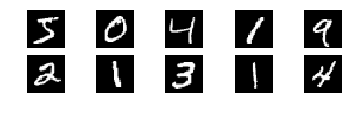

In [154]:
dirname = join(outdir, 'trainB')
for i in range(10):
    img = Image.open(join(dirname, '{:d}.png'.format(i)))

    plt.subplot(5,5,i+1)
    plt.imshow(img)
    plt.grid('off')
    plt.axis('off')

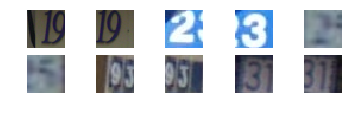

In [155]:
dirname = join(outdir, 'trainA')
for i in range(10):
    img = Image.open(join(dirname, '{:d}.png'.format(i)))
    plt.subplot(5,5,i+1)
    plt.imshow(img)
    plt.grid('off')
    plt.axis('off')

In [160]:
y = svhn_dataset.labels

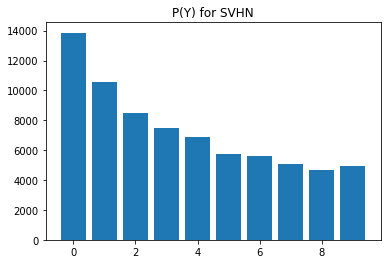

In [171]:
count,bins = np.histogram(y.squeeze(), bins=10)
plt.bar(range(10), count); plt.title('P(Y) for SVHN')

In [210]:
min_num = min(count)
ind = np.zeros((10,min_num), dtype=int)
for i in np.unique(y):
    binary_ind = np.where(y.squeeze() == i)[0]
    np.random.shuffle(binary_ind)
    
    ind[i-1,:] = binary_ind[:min_num]

ind = ind.flatten()
np.random.shuffle(ind)
y_new = y[ind]

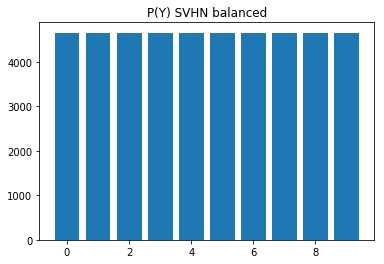

In [214]:
count_new,_ = np.histogram(y_new, bins=10)
plt.bar(range(10), count_new); plt.title('P(Y) SVHN balanced')

In [248]:
with open('/x/jhoffman/cyclegan_data/svhn2mnist/trainA/labels.txt', 'r') as f:
    data = f.read().splitlines()

parse = np.array([(int(x.split(' ')[0]), int(x.split(' ')[1])) for x in data])
d = dict(parse)